# <span style = 'color : Purple' >Bike Sharing Assignment
### <span style = 'color : Purple' >**- by  Akshaya Kumaar**

## **Problem Statement**<br>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**:<br>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Dictonary


=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)
Readme.txt
Displaying Readme.txt.

# Importing required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# <span style = 'color : Blue' > Reading and Understanding the Data
## Read Bike Sharing Dataset file that is "day.csv" as bike

In [2]:
bike = pd.read_csv("day.csv")

## <span style = 'color : Blue' > Exploratory Data Analysis

In [3]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the shape of dataframe

bike.shape

(730, 16)

In [6]:
#describe the columns

bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
#Get names of the columns

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike.size

11680

<span style='background: lightBlue '> Finding</span> :

We can see that the Dataset has 730 rows and 16 columns. ANd the total size is 11680

Except for the "dteday"(which is object dtype), rest of the columns are either float or integer type.


Based on initial review, We can see that there seems to be some columns that are categorical in nature, but are in integer/float dtype.


# DATA QUALITY CHECK

<span style='background: lightBlue '>Checking for the NULL/MISSING values in dataset

In [9]:
# checking column-wise
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# percentage of missing values column-wise
bike.isnull().sum()*100/bike.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# checking row-wise
bike.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [12]:
# percentage of missing values row-wise
100*(bike.isnull().sum(axis=1)/len(bike)).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### As we can see above, there are no missing / Null values in the dataset, neither in columns nor rows

<span style='background: lightBlue '>Duplicate Check

In [13]:
bike_dup = bike.copy()

In [14]:
# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [15]:
bike_dup.shape

(730, 16)

In [16]:
bike.shape

(730, 16)

The shape **"bike_dup"** and the original **"bike"** dataset is same as the original dataframe.
### Hence we can conclude that there no duplicate values in the dataset.

## Data Cleaning:

### Dropping columns that are not useful for data analysis
- instant:  its index value
- dteday:  As we already have seperate columns for 'Year' & 'Months'.
- casual and registered:  Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. Plus **cnt** is sum of both the values

In [17]:
bike.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column

In [18]:
bike.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

Inspecting Data after dropping columns

In [19]:
bike.shape
# now we have only 12 columns

(730, 12)

In [20]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [22]:
bike.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.067534  
workingday  0.062542  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

So from the above inspection we can clearly see that season,month and weekday which are supposed 
to be non-numerical are numerical which should be changed 

<span style='background: lightBlue '> Conver **int** to **Catagorical** Variables </span>

Converting 'season','mnth','weekday','weathersit' to catagorical

In [23]:
bike['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike['season'].value_counts()

# Converting 'Season' to a categorical variable

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [24]:
# Converting 'mnth' to categorical variable 

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike['mnth'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept',
       'oct', 'nov', 'dec'], dtype=object)

In [25]:
# Converting 'weekday' to objectin preparation for making dummy variable
bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [26]:
# Converting 'weathersit' to a categorical variable

bike['weathersit']=bike['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
bike['weathersit'].value_counts()

weathersit
Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: count, dtype: int64

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [28]:
bike.head(20)

season  yr mnth  holiday weekday  workingday   weathersit       temp  \
0   Spring   0  jan        0     sat           0  Mist_Cloudy  14.110847   
1   Spring   0  jan        0     sun           0  Mist_Cloudy  14.902598   
2   Spring   0  jan        0     mon           1        Clear   8.050924   
3   Spring   0  jan        0     tue           1        Clear   8.200000   
4   Spring   0  jan        0     wed           1        Clear   9.305237   
5   Spring   0  jan        0     thu           1        Clear   8.378268   
6   Spring   0  jan        0     fri           1  Mist_Cloudy   8.057402   
7   Spring   0  jan        0     sat           0  Mist_Cloudy   6.765000   
8   Spring   0  jan        0     sun           0        Clear   5.671653   
9   Spring   0  jan        0     mon           1        Clear   6.184153   
10  Spring   0  jan        0     tue           1  Mist_Cloudy   6.932731   
11  Spring   0  jan        0     wed           1        Clear   7.081807   
12  Spring   0  jan        0     thu           1        Clear   6.765000   
13  Spring   0  jan        0     fri           1        Clear   6.595670   
14  Spring   0  jan        0     sat           0  Mist_Cloudy   9.566653   
15  Spring   0  jan        0     sun           0        Clear   9.498347   
16  Spring   0  jan        1     mon           0  Mist_Cloudy   7.209153   
17  Spring   0  jan        0     tue           1  Mist_Cloudy   8.883347   
18  Spring   0  jan        0     wed           1  Mist_Cloudy  11.979134   
19  Spring   0  jan        0     thu           1  Mist_Cloudy  10.728347   

       atemp      hum  windspeed   cnt  
0   18.18125  80.5833  10.749882   985  
1   17.68695  69.6087  16.652113   801  
2    9.47025  43.7273  16.636703  1349  
3   10.60610  59.0435  10.739832  1562  
4   11.46350  43.6957  12.522300  1600  
5   11.66045  51.8261   6.000868  1606  
6   10.44195  49.8696  11.304642  1510  
7    8.11270  53.5833  17.875868   959  
8    5.80875  43.4167  24.250650   822  
9    7.54440  48.2917  14.958889  1321  
10   9.57320  68.6364   8.182844  1263  
11   8.02365  59.9545  20.410009  1162  
12   7.54415  47.0417  20.167000  1406  
13   9.42065  53.7826   8.478716  1421  
14  12.40560  49.8750  10.583521  1248  
15  11.71085  48.3750  12.625011  1204  
16   8.83855  53.7500  12.999139  1000  
17  11.61665  86.1667   9.833925   683  
18  14.92110  74.1739  13.957239  1650  
19  12.75250  53.8333  13.125568  1927

### Handling outliers

In [29]:
bike.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

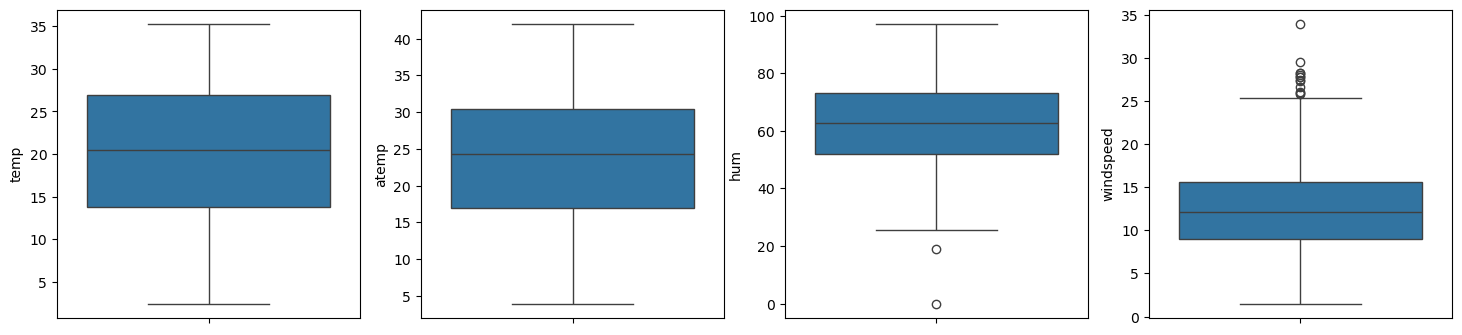

In [30]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

### Conclusion:
We can see, as per the above **box plots** that we don't have outliers

##  <span style = 'color : Green' > Analysis via Data Visualisation

 <span style = 'color : Blue' >Drawing pairplots to check for linear relationship

<Figure size 1500x3000 with 0 Axes>

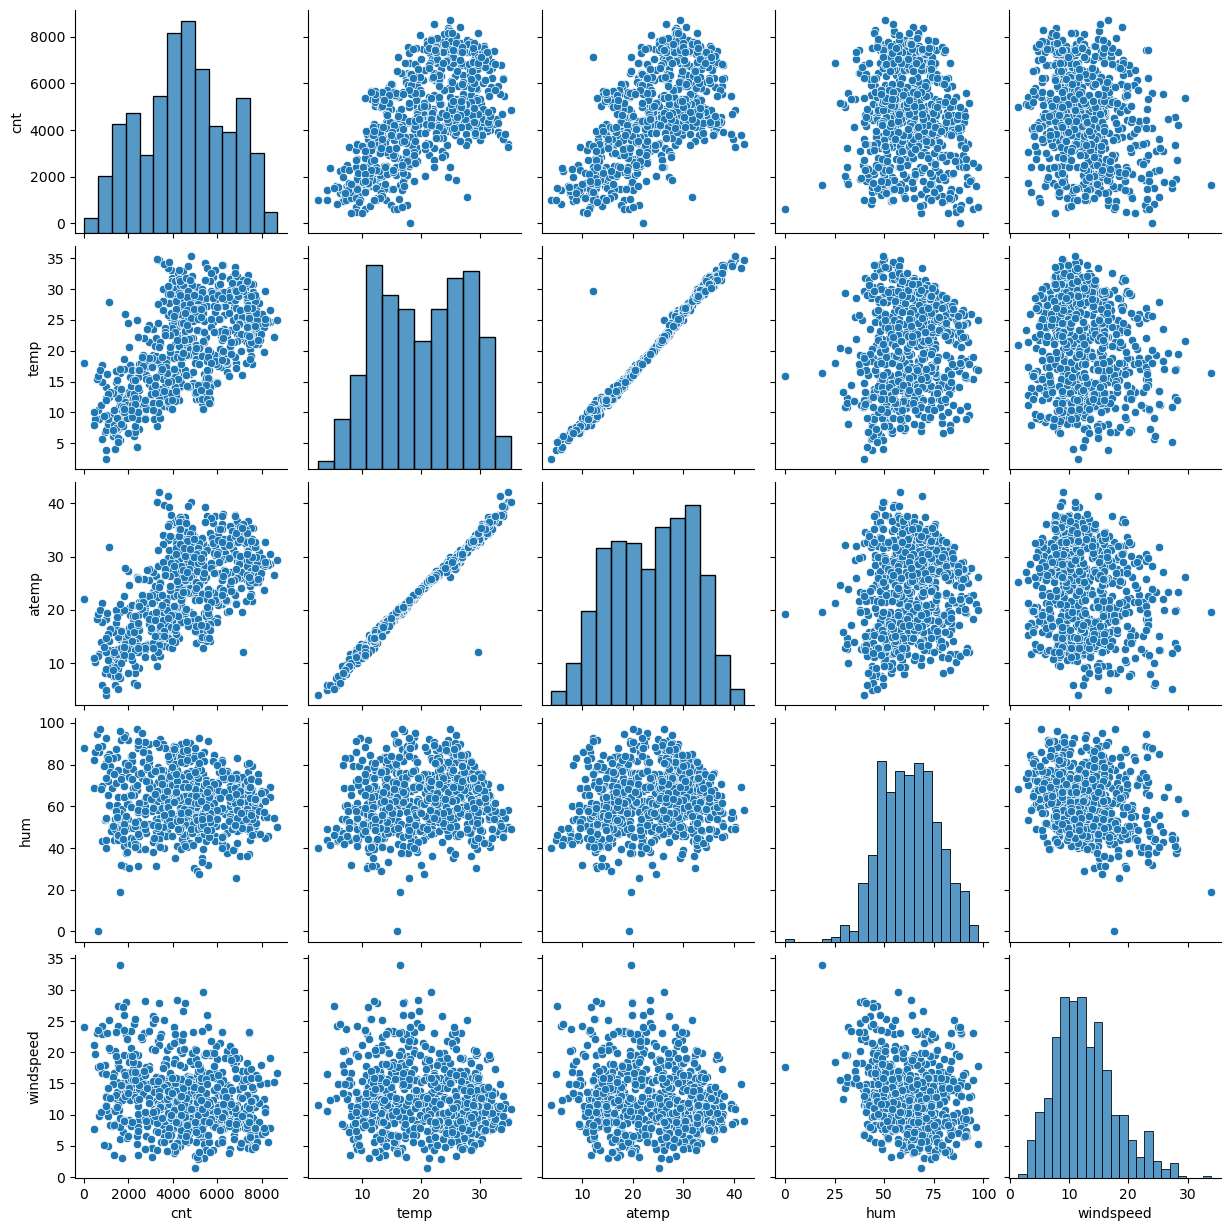

In [31]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can understand that **TEMP** and **ATEMP** are having high correlation and that there is a linear relationship between them.

<span style = 'color : Blue' >Visualising data to find correlation from numerical variables

<Figure size 2000x1500 with 0 Axes>

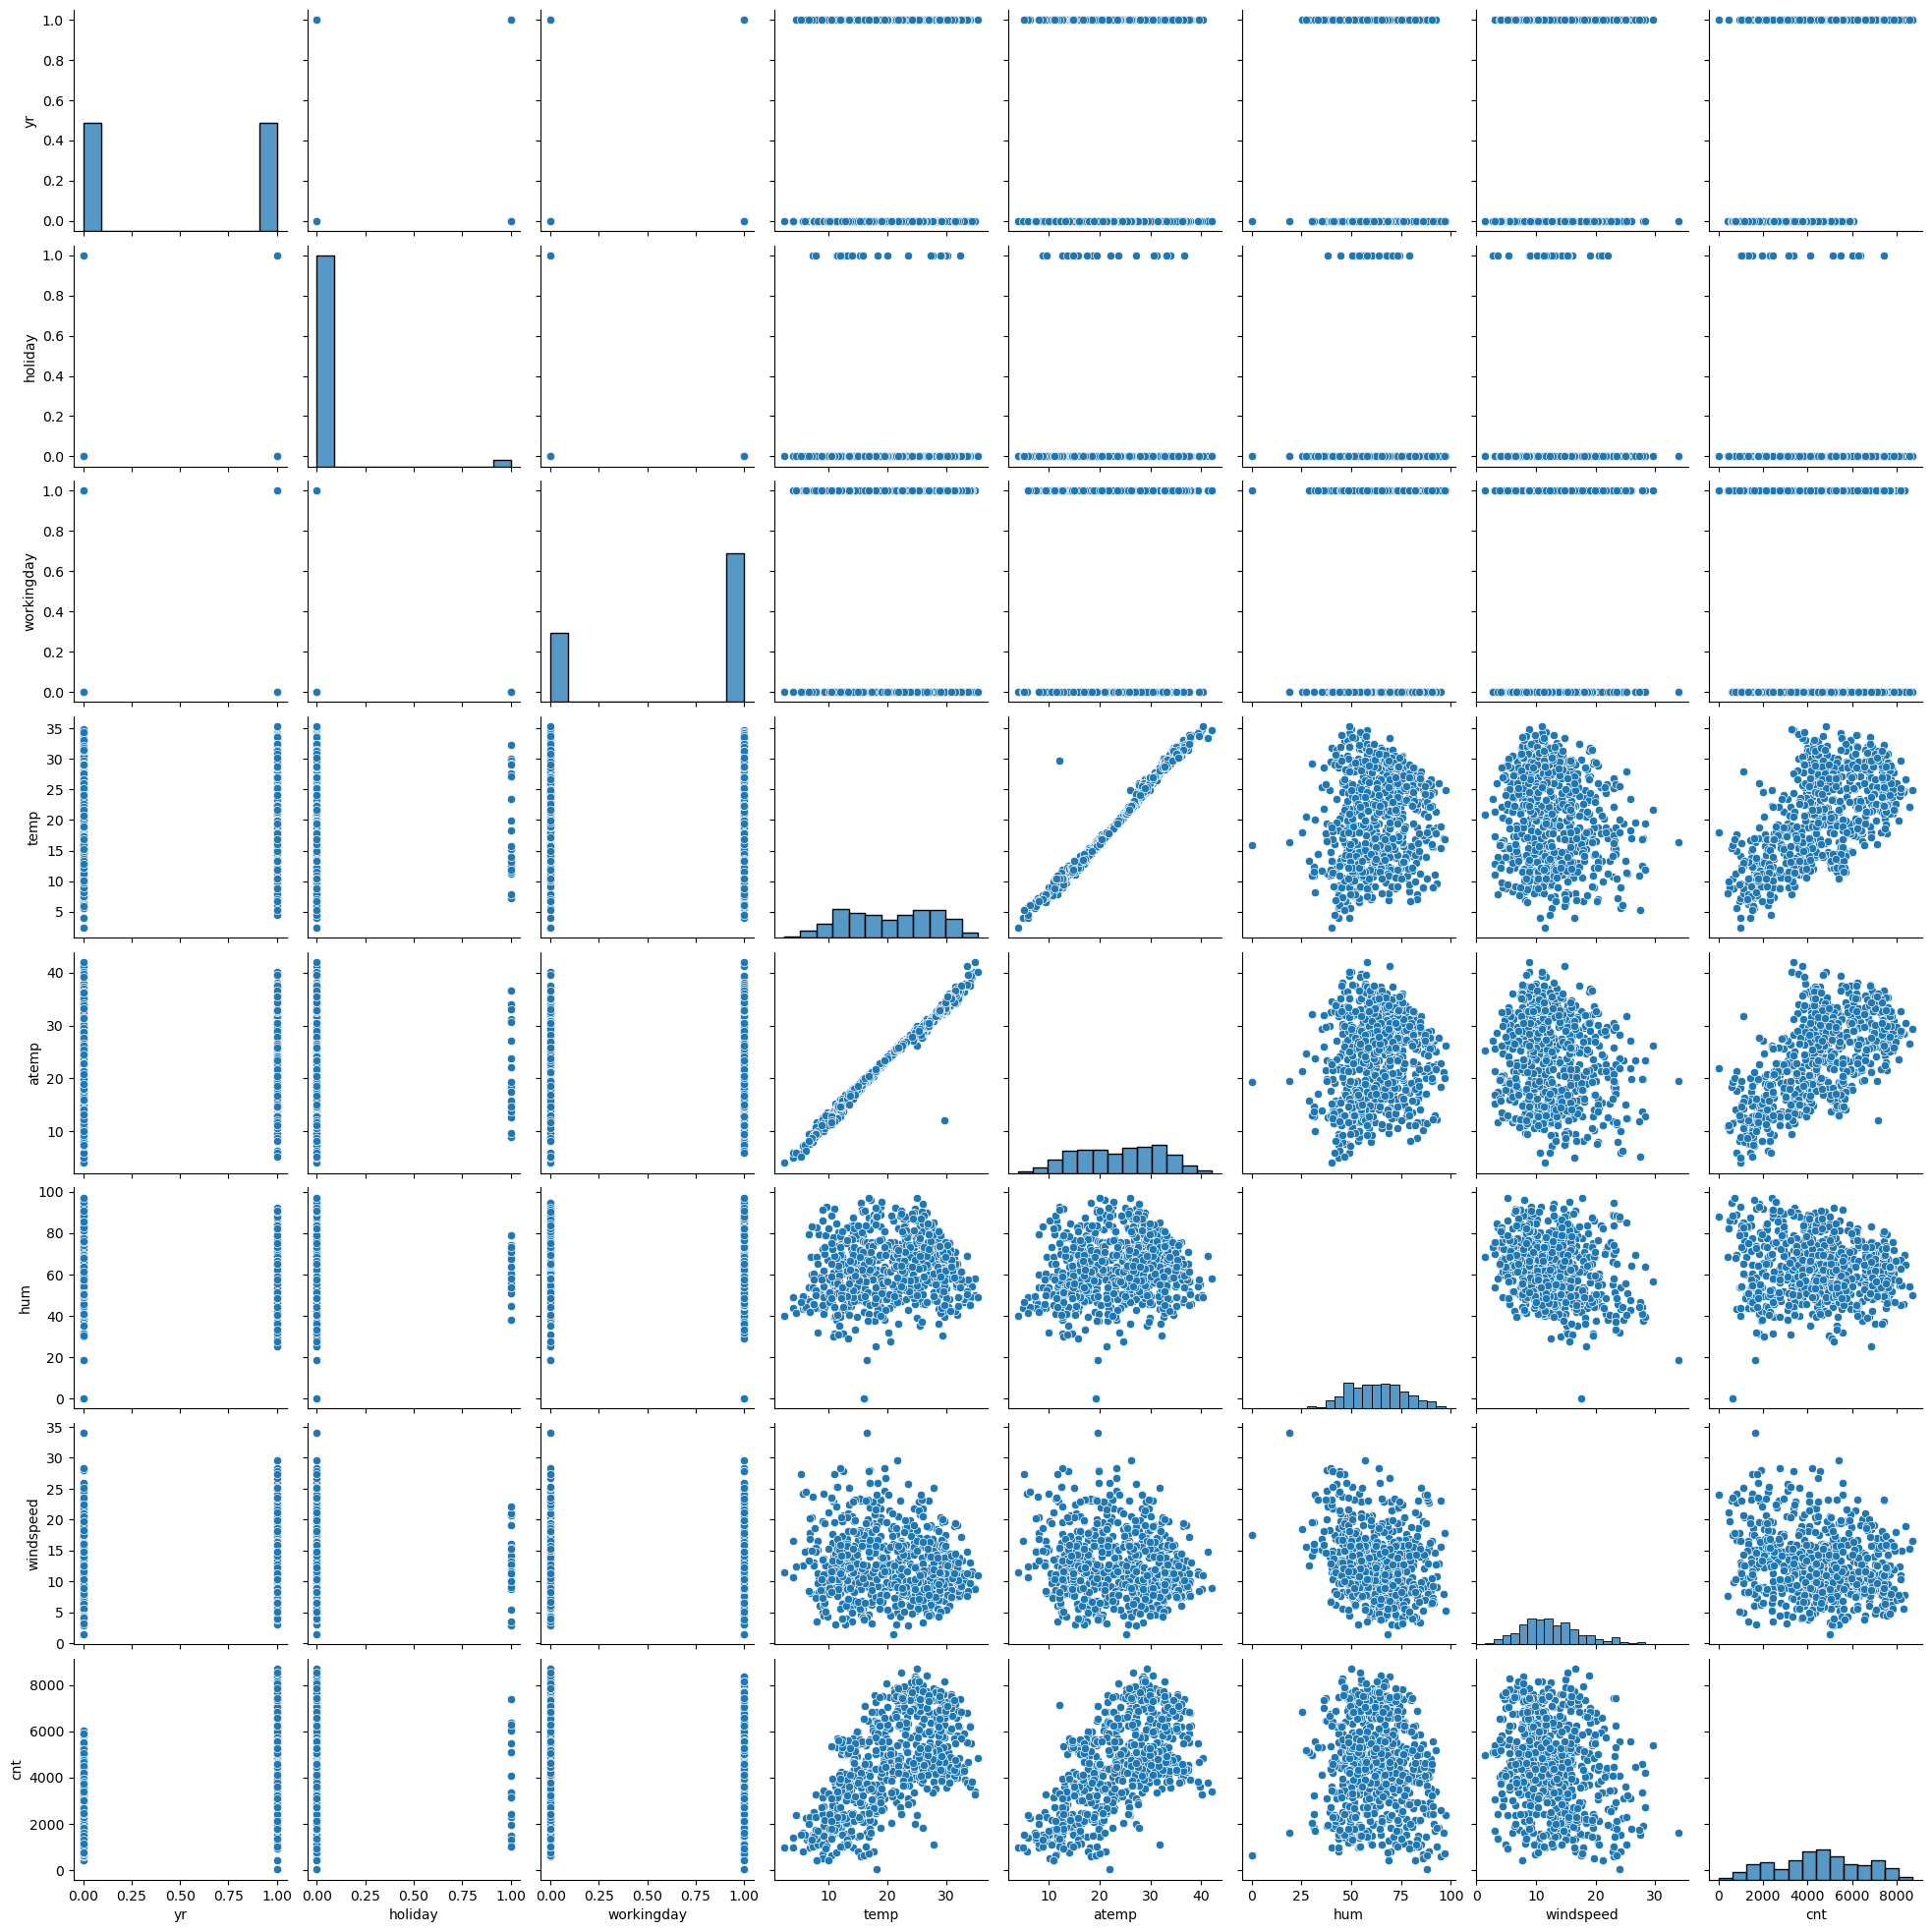

In [32]:
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

<span style='color : blue '>Visualizing Binary Columns (Numerical Variables)</span>  

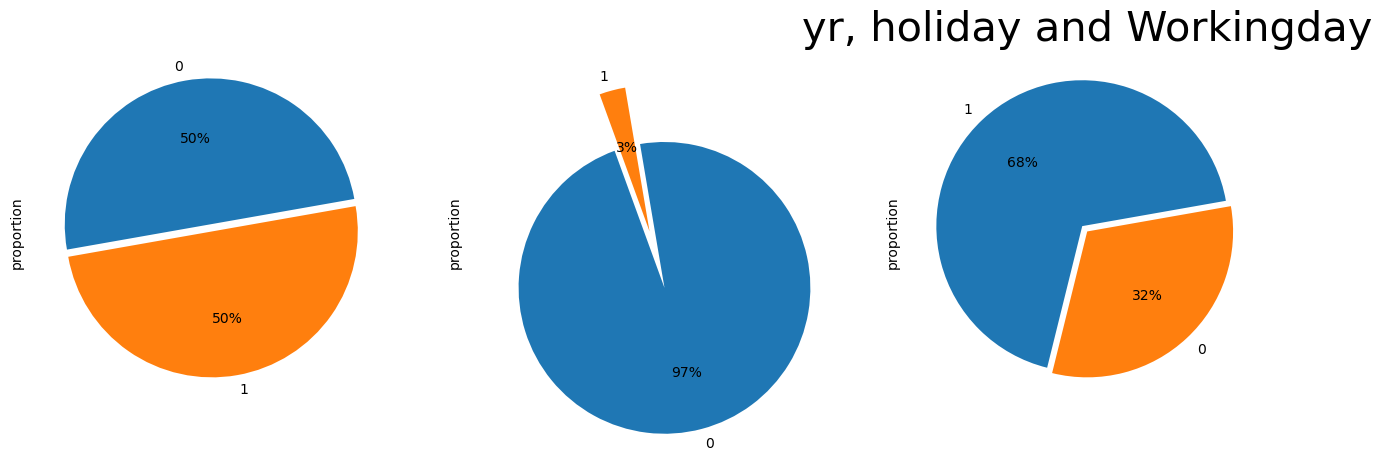

In [33]:
plt.figure(figsize = [16,15])
plt.subplot(131)
bike['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
bike['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
bike['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

* By observing the 3 pi charts we can came to conclusion that 
    - 'Yr' is expected to be 50%-50% daily records of bike usage. 
    - Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0. 
    - The same case applies to 'workingday' due to higher number of days vs non-working days.

<span style='color : blue '>Visualizing Binary Columns (Categorical Variables)</span>  

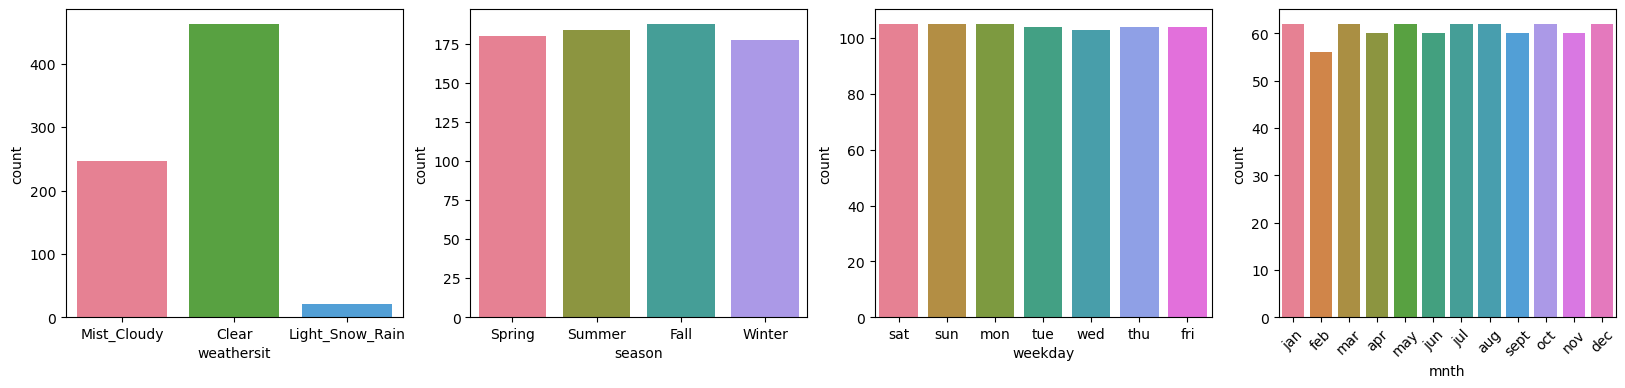

In [34]:
plt.figure(figsize=[20, 4])

# Define a palette with a unique color for each bar
palette = sns.color_palette("husl", n_colors=bike['weathersit'].nunique())

plt.subplot(141)
sns.countplot(data=bike, x='weathersit', palette=palette)
plt.subplot(142)
palette = sns.color_palette("husl", n_colors=bike['season'].nunique())
sns.countplot(data=bike, x='season', palette=palette)
plt.subplot(143)
palette = sns.color_palette("husl", n_colors=bike['weekday'].nunique())
sns.countplot(data=bike, x='weekday', palette=palette)
plt.subplot(144)
palette = sns.color_palette("husl", n_colors=bike['mnth'].nunique())
sns.countplot(data=bike, x='mnth', palette=palette)
plt.xticks(rotation=45)

plt.show()

* By analyzing the plots, we can observe the following:
    - **Weather Situation** (weathersit): Bike usage is highest when the weather is clear, with a few clouds, or partly cloudy.
    - **Other Variables:** The distributions of bike usage across other variables are quite similar and show relatively close values. 

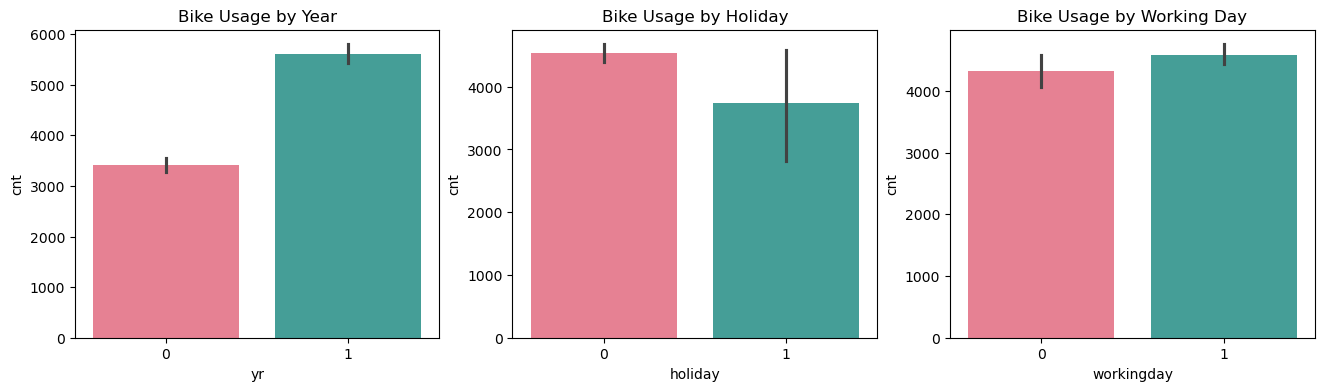

In [35]:
plt.figure(figsize=[16, 4])

palette_yr = sns.color_palette("husl", n_colors=bike['yr'].nunique())
palette_holiday = sns.color_palette("husl", n_colors=bike['holiday'].nunique())
palette_workingday = sns.color_palette("husl", n_colors=bike['workingday'].nunique())

plt.subplot(131)
sns.barplot(x='yr', y='cnt', data=bike, palette=palette_yr)
plt.title('Bike Usage by Year')

plt.subplot(132)
sns.barplot(x='holiday', y='cnt', data=bike, palette=palette_holiday)
plt.title('Bike Usage by Holiday')

plt.subplot(133)
sns.barplot(x='workingday', y='cnt', data=bike, palette=palette_workingday)
plt.title('Bike Usage by Working Day')

plt.show()

* From the plots, we can conclude the following:

    - Yearly Trend: There is an increase in the number of bike users from 2018 to 2019.
    - Holiday vs. Non-Holiday Usage: Bike usage is higher on holidays compared to non-holidays.
    - Working Day vs. Non-Working Day Usage: There is minimal difference in bike usage between working days and non-working days.

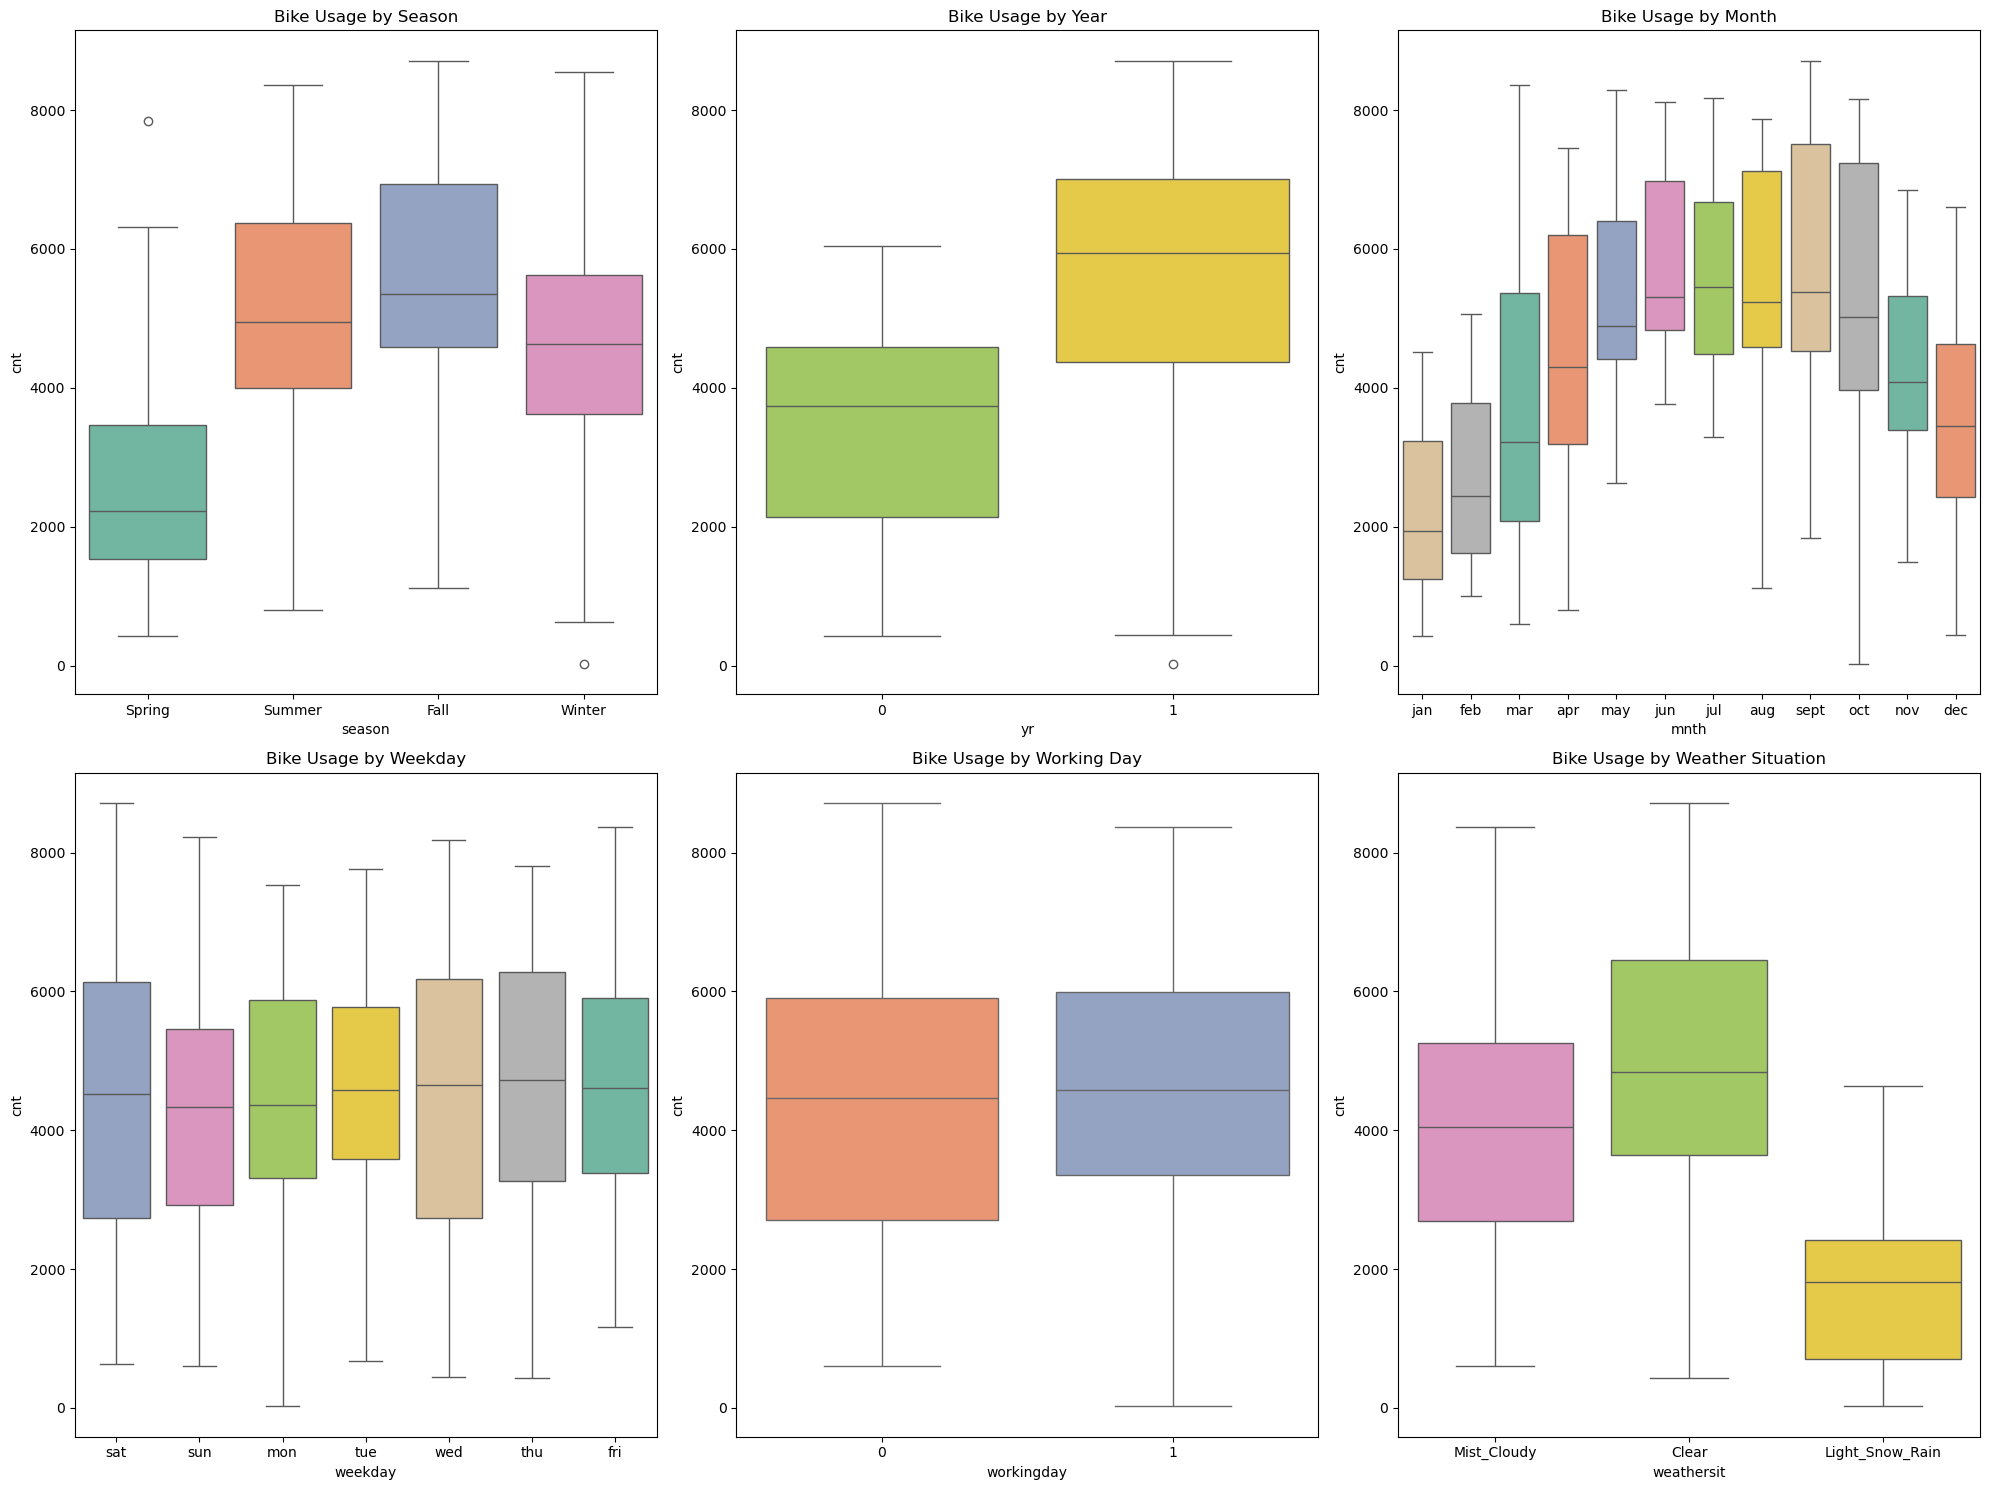

In [36]:
color_palette = sns.color_palette("Set2", n_colors=bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique() + bike['weekday'].nunique() + bike['workingday'].nunique() + bike['weathersit'].nunique())

plt.figure(figsize=(20, 15))

# Use the first portion of the palette for each subplot
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike, palette=color_palette[:bike['season'].nunique()])
plt.title('Bike Usage by Season')

plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike, palette=color_palette[bike['season'].nunique():bike['season'].nunique() + bike['yr'].nunique()])
plt.title('Bike Usage by Year')

plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike, palette=color_palette[bike['season'].nunique() + bike['yr'].nunique():bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique()])
plt.title('Bike Usage by Month')

plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=bike, palette=color_palette[bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique():bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique() + bike['weekday'].nunique()])
plt.title('Bike Usage by Weekday')

plt.subplot(2, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=bike, palette=color_palette[bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique() + bike['weekday'].nunique():bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique() + bike['weekday'].nunique() + bike['workingday'].nunique()])
plt.title('Bike Usage by Working Day')

plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike, palette=color_palette[bike['season'].nunique() + bike['yr'].nunique() + bike['mnth'].nunique() + bike['weekday'].nunique() + bike['workingday'].nunique():])
plt.title('Bike Usage by Weather Situation')

plt.tight_layout()
plt.show()

Insights <br>
The dataset contains six categorical variables, which we analyzed to understand their effect on the dependent variable (cnt). Here are the key findings: <br>

**Season:** Approximately 32% of bike bookings occurred in Season 3 (fall), with a median of over 5000 bookings during the 2-year period. This was followed by Season 2 (summer) and Season 4 (winter), accounting for 27% and 25% of total bookings, respectively. This suggests that the season is a significant predictor for bike bookings.<br>

**Month:** Bike bookings were highest in the months of May through September, accounting for about 10% of the total bookings each month, with a median of over 4000 bookings per month. This indicates a clear trend in monthly bookings, making the month a potentially useful predictor.<br>

**Weather Situation:** Approximately 67% of bike bookings occurred under Weather Situation 1, with a median close to 5000 bookings over the 2-year period. Weather Situation 2 followed with 30% of the bookings. This suggests that weather conditions have a notable impact on bike bookings and could be a good predictor.<br>

**Holiday:** The data shows that 97.6% of bike bookings occurred on non-holidays, indicating a strong bias in the dataset. This suggests that the holiday variable may not be a useful predictor for bike bookings.<br>

**Weekday:** The distribution of bike bookings across weekdays is fairly uniform, with each day contributing between 13.5% and 14.8% of total bookings and medians ranging from 4000 to 5000 bookings. This suggests that the weekday variable might have a minor influence on bookings, and its impact should be assessed by the model.<br>

**Working Day:** About 69% of bike bookings occurred on working days, with a median close to 5000 bookings. This suggests that working days are a significant predictor of bike bookings.<br>

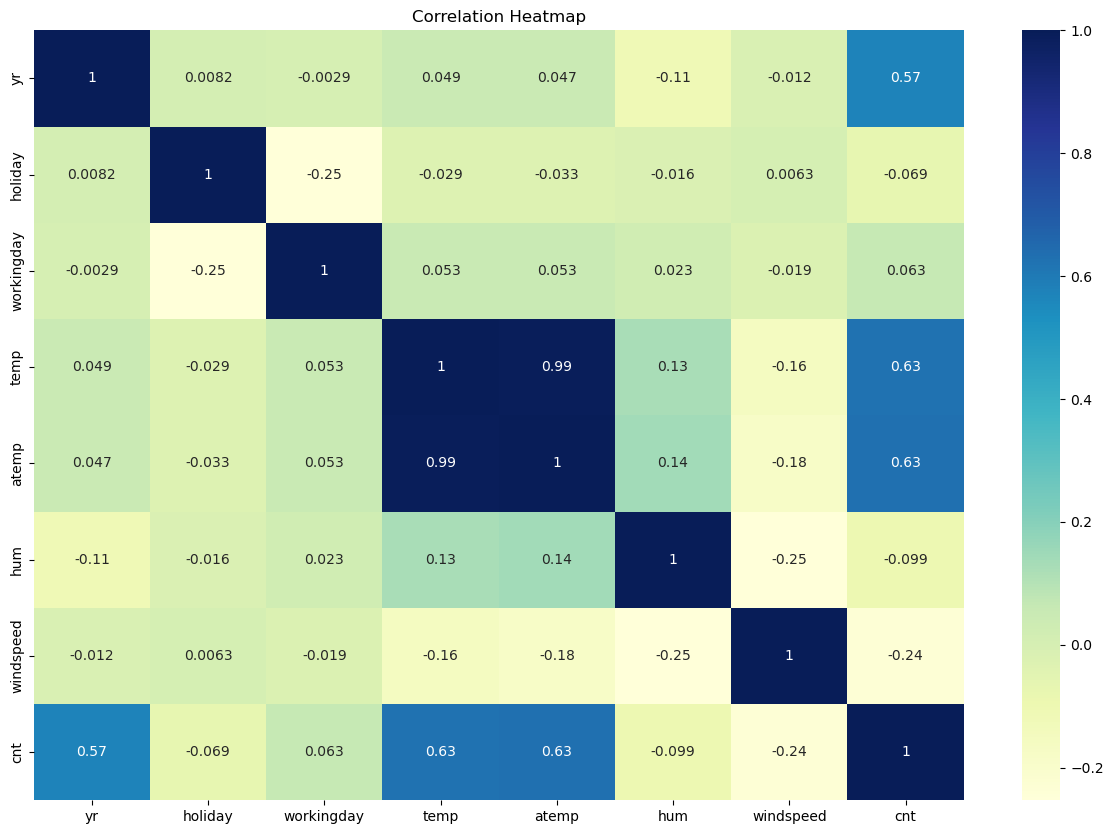

In [37]:
# Heatmap for correlation between numeric variables

numeric_data = bike.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

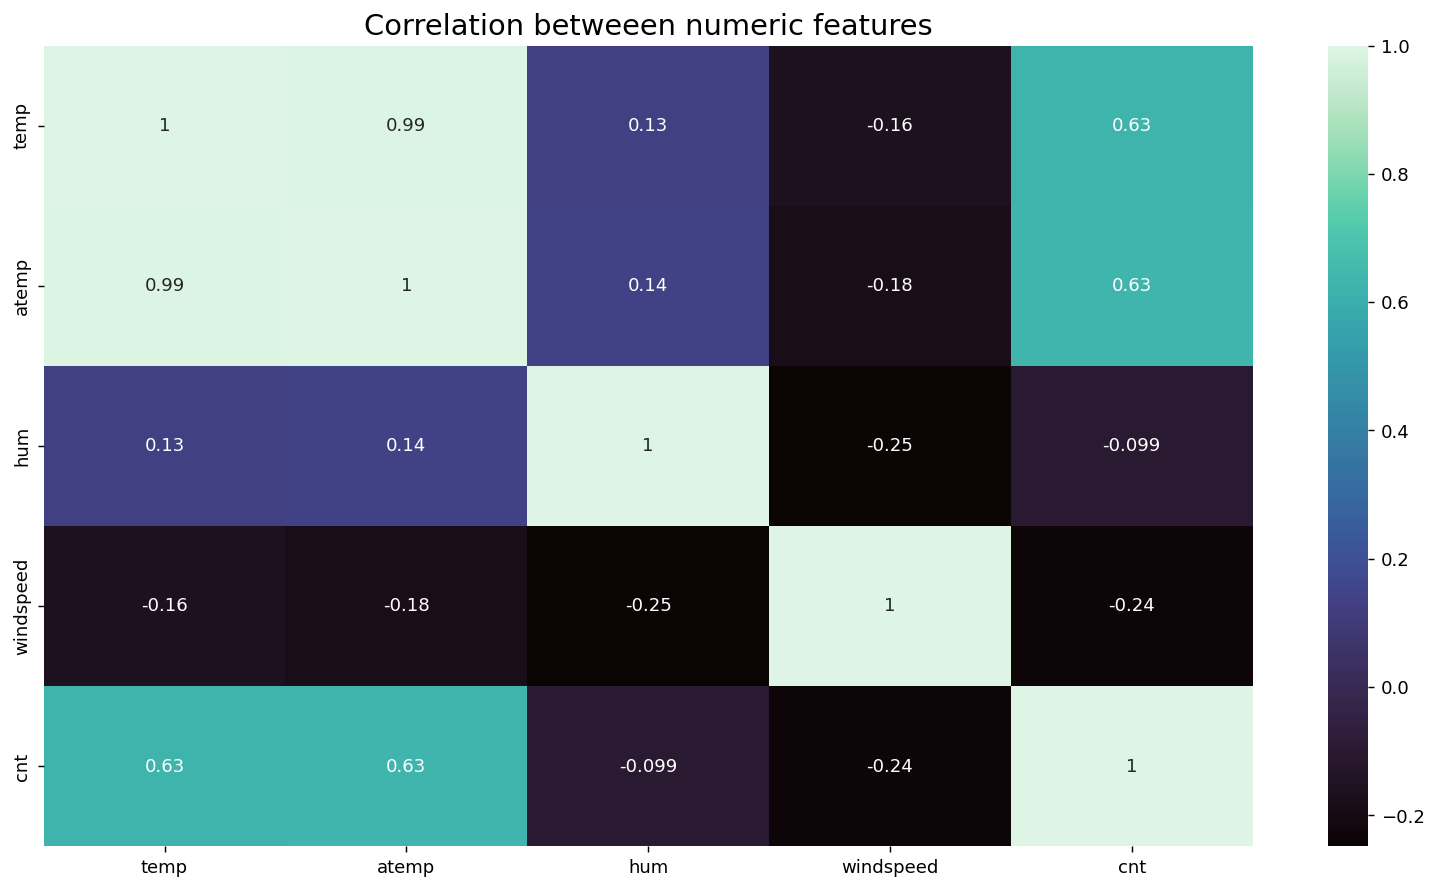

In [38]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike[num_features].corr(),annot= True,cmap="mako")
plt.show()

**Insights:** <br>
The heatmap provides a clear view of multicollinearity among variables and highlights which variables exhibit high collinearity with the target variable.<br>

We will use this heatmap as a reference during the linear modeling process to validate correlated variables. It will help us assess the Variance Inflation Factor (VIF) and p-values to determine which variables should be included or excluded from the model.

# <span style = 'color : Blue' > Data Prep for Linear Regression <br>

## <span style = 'color : green' > Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.<br>

This below code does 3 things:<br>
        1) Create Dummy variable. <br>
        2) Drop original variable for which the dummy was created. <br>
        3) Drop first dummy variable for each set of dummies created.

In [39]:
bike = pd.get_dummies(data=bike, columns=["season", "mnth", "weekday"], drop_first=True)
bike = pd.get_dummies(data=bike, columns=["weathersit"])

# Convert boolean columns to integers
bool_cols = bike.select_dtypes(include=[bool]).columns
bike[bool_cols] = bike[bool_cols].astype(int)

In [40]:
bike.shape

(730, 31)

In [41]:
bike.head(10)

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
5   0        0           1   8.378268  11.66045  51.8261   6.000868  1606   
6   0        0           1   8.057402  10.44195  49.8696  11.304642  1510   
7   0        0           0   6.765000   8.11270  53.5833  17.875868   959   
8   0        0           0   5.671653   5.80875  43.4167  24.250650   822   
9   0        0           1   6.184153   7.54440  48.2917  14.958889  1321   

   season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  mnth_feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   
5              1              0              0         0         0         0   
6              1              0              0         0         0         0   
7              1              0              0         0         0         0   
8              1              0              0         0         0         0   
9              1              0              0         0         0         0   

   mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   
5         1         0         0         0         0         0         0   
6         1         0         0         0         0         0         0   
7         1         0         0         0         0         0         0   
8         1         0         0         0         0         0         0   
9         1         0         0         0         0         0         0   

   mnth_sept  weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0          0            0            1            0            0            0   
1          0            0            0            1            0            0   
2          0            1            0            0            0            0   
3          0            0            0            0            0            1   
4          0            0            0            0            0            0   
5          0            0            0            0            1            0   
6          0            0            0            0            0            0   
7          0            0            1            0            0            0   
8          0            0            0            1            0            0   
9          0            1            0            0            0            0   

   weekday_wed  weathersit_Clear  weathersit_Light_Snow_Rain  \
0            0                 0                           0   
1            0                 0                           0   
2            0                 1                           0   
3            0                 1                           0   
4            1                 1                           0   
5            0                 1                           0   
6            0                 0                           0   
7            0                 0            

In [42]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Clear', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

# <span style = 'color : Red' >  SPLITTING THE DATA
Splitting the data to <span style='background: lightGreen '> Train and Test</span>  : - We will now split the data into TRAIN and TEST (70:30 ratio)
We will use train_test_split method from sklearn package for this

In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    int32  
 9   season_Summer               730 non-null    int32  
 10  season_Winter               730 non-null    int32  
 11  mnth_aug                    730 non-null    int32  
 12  mnth_dec                    730 non-null    int32  
 13  mnth_feb                    730 non

In [44]:
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [45]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    int32  
 9   season_Summer               510 non-null    int32  
 10  season_Winter               510 non-null    int32  
 11  mnth_aug                    510 non-null    int32  
 12  mnth_dec                    510 non-null    int32  
 13  mnth_feb                    510 non-nu

In [46]:
bike_train.shape

(510, 31)

In [47]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    int32  
 9   season_Summer               219 non-null    int32  
 10  season_Winter               219 non-null    int32  
 11  mnth_aug                    219 non-null    int32  
 12  mnth_dec                    219 non-null    int32  
 13  mnth_feb                    219 non-nul

In [48]:
bike_test.shape

(219, 31)

In [49]:
print(list(bike_train.columns))

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Clear', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy']


* We can say by looking at the data that 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical variables

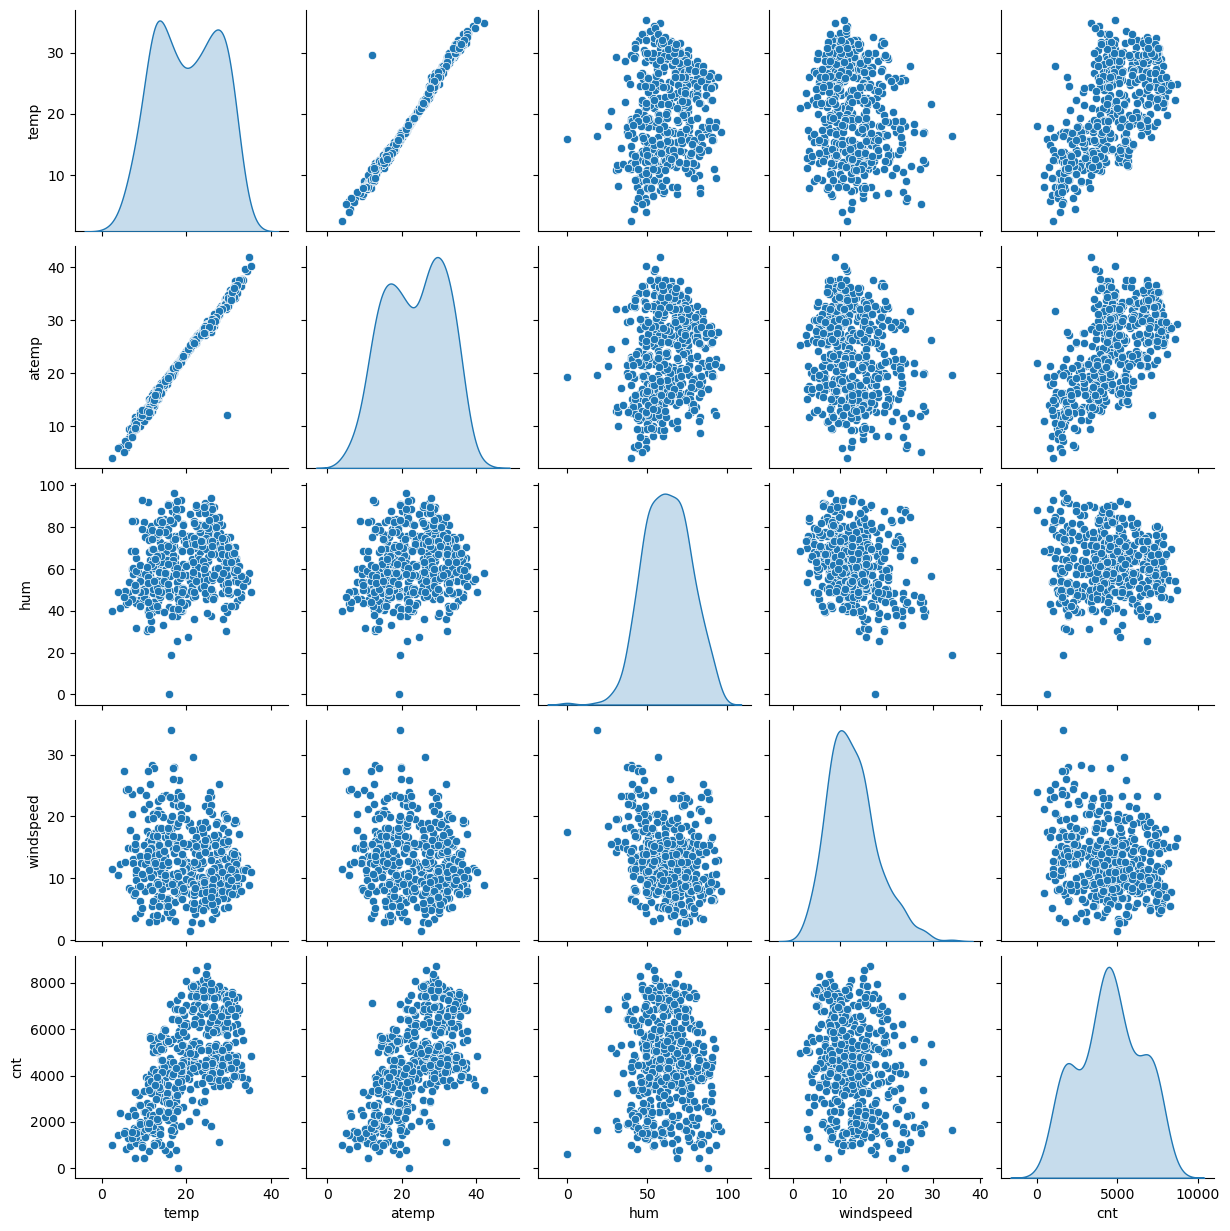

In [50]:
# Create a new dataframe of only numeric variables:

bike_num=bike_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

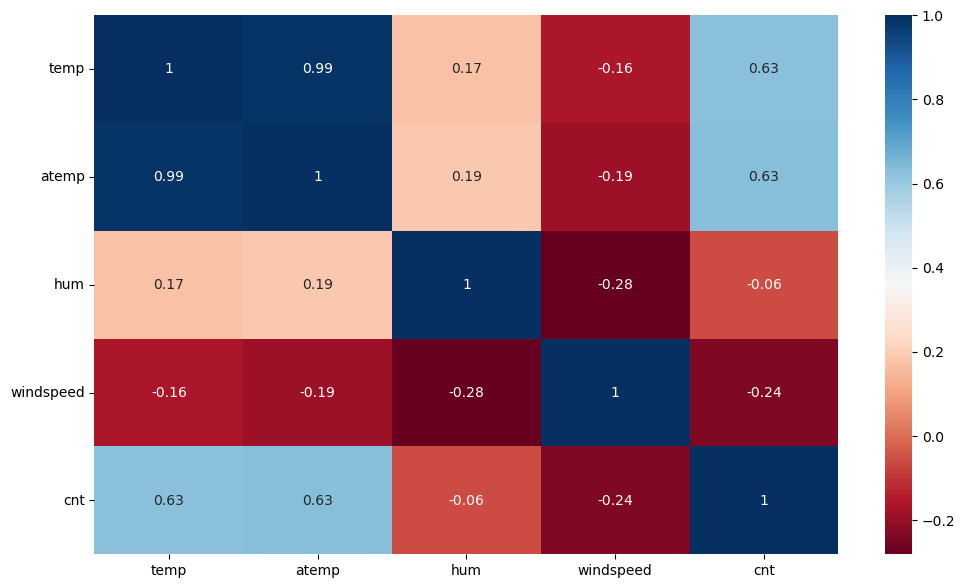

In [51]:
plt.figure(figsize = (12,7))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdBu")

plt.yticks(rotation = 0)
plt.show()

The above correlation plot tells us that there is a high correlation between 'temp','atemp' vs 'cnt'

In [52]:
scaler = MinMaxScaler()

In [53]:
# Checking the values before scaling
bike_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_Spring  season_Summer  season_Winter  mnth_aug  mnth_dec  \
483              0              1              0         0         0   
650              0              0              1         0         0   
212              0              0              0         1         0   
714              0              0              1         0         1   
8                1              0              0         0         0   

     mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  \
483         0         0         0         0         0         0         0   
650         0         0         0         0         0         0         0   
212         0         0         0         0         0         0         0   
714         0         0         0         0         0         0         0   
8           0         1         0         0         0         0         0   

     mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
483         0          0            0            0            1            0   
650         1          0            0            1            0            0   
212         0          0            1            0            0            0   
714         0          0            0            0            1            0   
8           0          0            0            0            1            0   

     weekday_tue  weekday_wed  weathersit_Clear  weathersit_Light_Snow_Rain  \
483            0            0                 1                           0   
650            0            0                 1                           0   
212            0            0                 1                           0   
714            0            0                 0                           0   
8              0            0                 1                           0   

     weathersit_Mist_Cloudy  
483                       0  
650                       0  
212                       0  
714                       1  
8                         0

In [54]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Clear', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [55]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [56]:
# Checking values after scaling
bike_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
483   1        0           0  0.497426  0.487055  0.609956   0.194850   
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           0  0.378013  0.381804  0.871429   0.161523   
8     0        0           0  0.098690  0.048706  0.451083   0.700017   

          cnt  season_Spring  season_Summer  season_Winter  mnth_aug  \
483  0.722734              0              1              0         0   
650  0.815347              0              0              1         0   
212  0.488265              0              0              0         1   
714  0.433042              0              0              1         0   
8    0.092039              1              0              0         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
483         0         0         0         0         0         0         0   
650         0         0         0         0         0         0         0   
212         0         0         0         0         0         0         0   
714         1         0         0         0         0         0         0   
8           0         0         1         0         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
483         0         0          0            0            0            1   
650         0         1          0            0            1            0   
212         0         0          0            1            0            0   
714         0         0          0            0            0            1   
8           0         0          0            0            0            1   

     weekday_thu  weekday_tue  weekday_wed  weathersit_Clear  \
483            0            0            0                 1   
650            0            0            0                 1   
212            0            0            0                 1   
714            0            0            0                 0   
8              0            0            0                 1   

     weathersit_Light_Snow_Rain  weathersit_Mist_Cloudy  
483                           0                       0  
650                           0                       0  
212                           0                       0  
714                           0                       1  
8                             0                       0

In [57]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.682353    0.540901    0.515631    0.647390   
std      0.500487    0.151726    0.466018    0.227898    0.213626    0.149722   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.343228    0.335807    0.536147   
50%      1.000000    0.000000    1.000000    0.540519    0.525578    0.646367   
75%      1.000000    0.000000    1.000000    0.740406    0.692378    0.757900   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_Spring  season_Summer  season_Winter  \
count  510.000000  510.000000      510.00000     510.000000     510.000000   
mean     0.346318    0.515144        0.24902       0.247059       0.241176   
std      0.160266    0.224281        0.43287       0.431725       0.428217   
min      0.000000    0.000000        0.00000       0.000000       0.000000   
25%      0.230784    0.359468        0.00000       0.000000       0.000000   
50%      0.325635    0.516337        0.00000       0.000000       0.000000   
75%      0.434287    0.685861        0.00000       0.000000       0.000000   
max      1.000000    1.000000        1.00000       1.000000       1.000000   

         mnth_aug    mnth_dec    mnth_feb    mnth_jan    mnth_jul    mnth_jun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.076471    0.082353    0.084314    0.078431    0.072549   
std      0.297660    0.266010    0.275172    0.278131    0.269113    0.259649   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_mar    mnth_may    mnth_nov    mnth_oct   mnth_sept  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.078431    0.092157    0.086275    0.084314    0.082353   
std      0.269113    0.289531    0.281045    0.278131    0.275172   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.139216     0.150980     0.143137     0.129412     0.141176   
std       0.346511     0.358381     0.350557     0.335985     0.348545   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_Clear  weathersit_Light_Snow_Rain  \
count   510.000000        510.000000                  510.000000   
mean      0.150980          0.633333                    0.025490   
std       0.358381          0.482368                    0.157763   
min       0.000000          0.000000                    0.000000   
25%       0.000000          0.000000                    0.000000   
50%       0.000000          1.000000                    0.000000   
75%       0.000000          1.000000                    0.000000   
max       1.000000 

In [58]:
#y to contain only target variable
y_train=bike_train.pop('cnt')

#X is all remainign variable also our independent variables
X_train=bike_train

y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

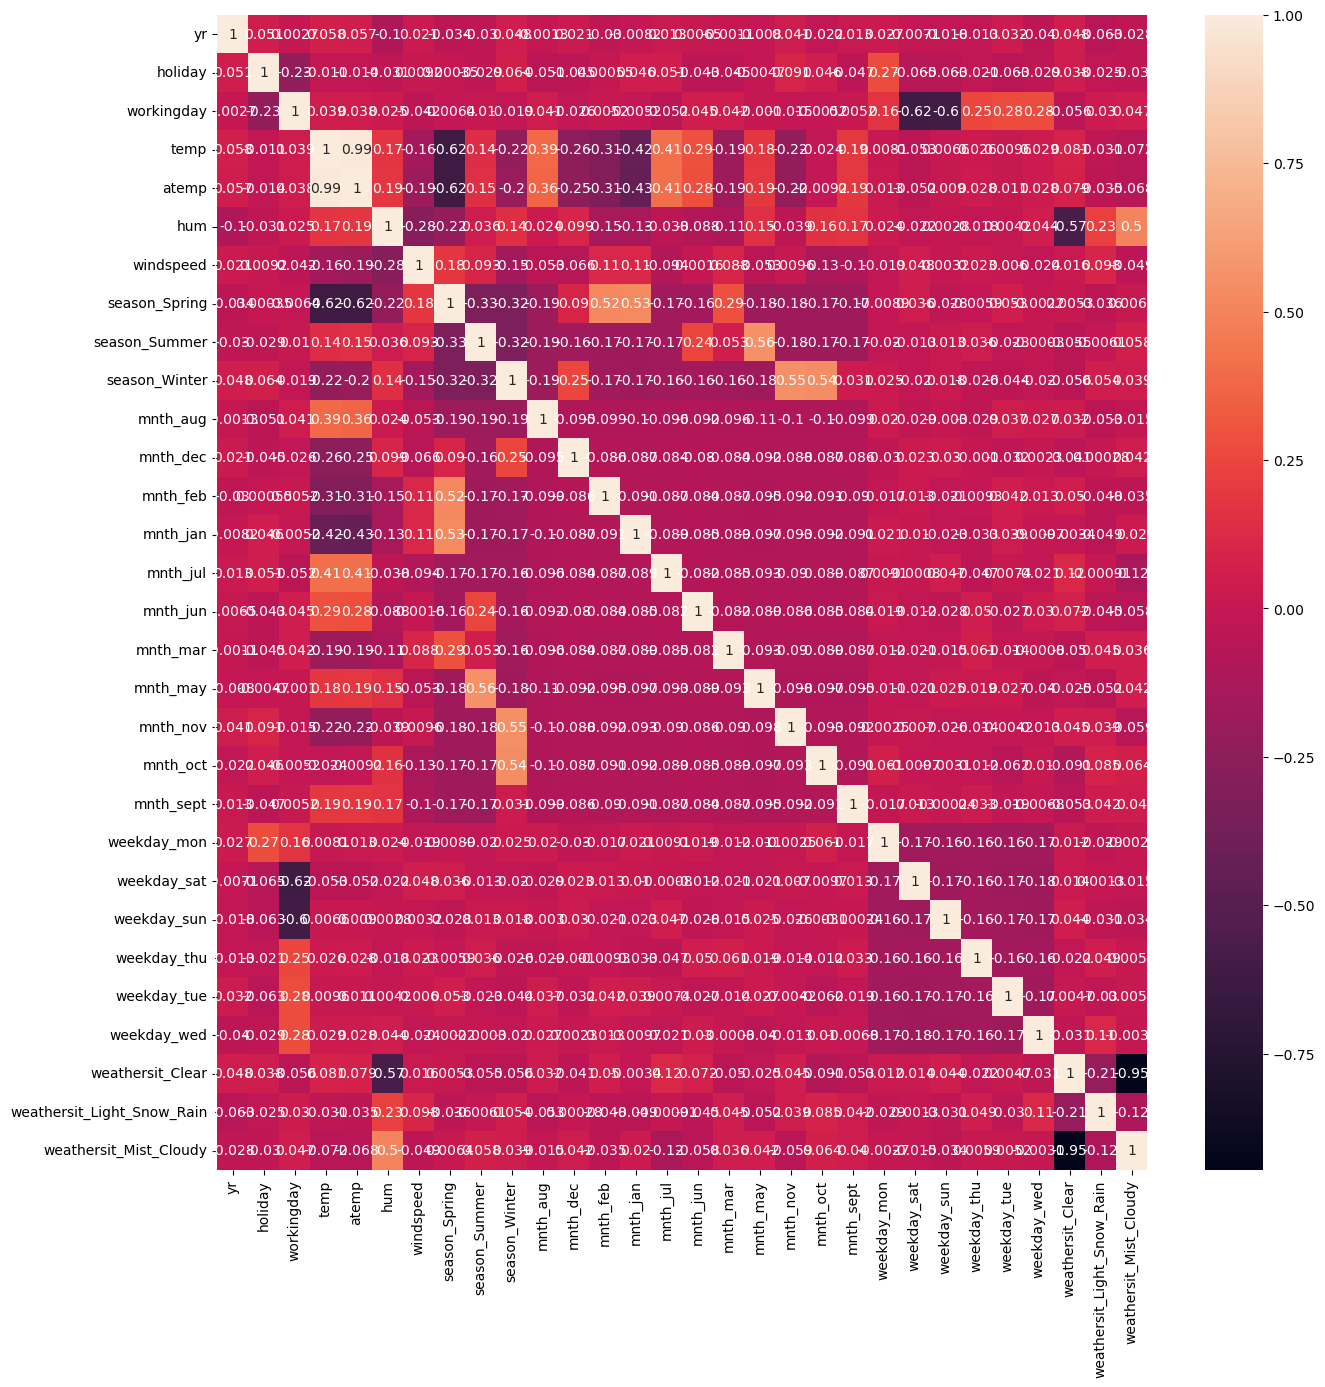

In [59]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

# <span style = 'color : green' > Building a Linear Model using RFE

In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
#Cut down no of features to 15
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [62]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 5),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 15),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 16),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_Clear', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'mnth_aug', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [65]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model - 1

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                         temp  53.24
2                        atemp  51.93
12            weathersit_Clear  42.14
14      weathersit_Mist_Cloudy  28.59
13  weathersit_Light_Snow_Rain   3.55
5                season_Spring   2.83
6                season_Winter   2.24
3                          hum   1.95
10                    mnth_nov   1.72
8                     mnth_jan   1.53
7                     mnth_dec   1.36
9                     mnth_jul   1.31
4                    windspeed   1.24
11                   mnth_sept   1.12
0                           yr   1.04

In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [69]:
# Check the parameters obtained

lr1.params

const                         0.213666
yr                            0.230173
temp                          0.304379
atemp                         0.136796
hum                          -0.175344
windspeed                    -0.183906
season_Spring                -0.111069
season_Winter                 0.074112
mnth_dec                     -0.054523
mnth_jan                     -0.040160
mnth_jul                     -0.052319
mnth_nov                     -0.065166
mnth_sept                     0.059881
weathersit_Clear              0.172147
weathersit_Light_Snow_Rain   -0.085251
weathersit_Mist_Cloudy        0.126770
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          3.62e-183
Time:                        03:28:17   Log-Likelihood:                 498.30
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     495   BIC:                            -903.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model - 2

* Removing the variable 'atemp' based on its Very High 'VIF' value.<br>
* Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br> 

In [71]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11            weathersit_Clear  41.78
13      weathersit_Mist_Cloudy  28.44
12  weathersit_Light_Snow_Rain   3.54
1                         temp   3.41
4                season_Spring   2.83
5                season_Winter   2.23
2                          hum   1.95
9                     mnth_nov   1.72
7                     mnth_jan   1.52
6                     mnth_dec   1.35
8                     mnth_jul   1.31
3                    windspeed   1.20
10                   mnth_sept   1.12
0                           yr   1.04

In [73]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [74]:
lr2.params

const                         0.215585
yr                            0.230205
temp                          0.429989
hum                          -0.173241
windspeed                    -0.188717
season_Spring                -0.111065
season_Winter                 0.075156
mnth_dec                     -0.054993
mnth_jan                     -0.041527
mnth_jul                     -0.052295
mnth_nov                     -0.065906
mnth_sept                     0.059016
weathersit_Clear              0.173292
weathersit_Light_Snow_Rain   -0.085266
weathersit_Mist_Cloudy        0.127559
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.17e-184
Time:                        03:28:17   Log-Likelihood:                 497.80
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     496   BIC:                            -908.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## **Model - 3** <br>
* Removing the variable 'hum' based on its Very High 'VIF' value.

In [76]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10            weathersit_Clear  24.98
12      weathersit_Mist_Cloudy  13.19
1                         temp   3.26
3                season_Spring   2.83
4                season_Winter   2.21
11  weathersit_Light_Snow_Rain   1.95
8                     mnth_nov   1.72
6                     mnth_jan   1.51
5                     mnth_dec   1.33
7                     mnth_jul   1.30
9                    mnth_sept   1.11
2                    windspeed   1.10
0                           yr   1.02

In [78]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [79]:
# Check the parameters obtained

lr3.params

const                         0.123980
yr                            0.234791
temp                          0.397616
windspeed                    -0.152833
season_Spring                -0.111312
season_Winter                 0.068865
mnth_dec                     -0.066185
mnth_jan                     -0.045242
mnth_jul                     -0.044894
mnth_nov                     -0.066444
mnth_sept                     0.053428
weathersit_Clear              0.169237
weathersit_Light_Snow_Rain   -0.140208
weathersit_Mist_Cloudy        0.094952
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.65e-181
Time:                        03:28:17   Log-Likelihood:                 487.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     497   BIC:                            -893.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## **Model - 4**

* Removing the variable windspeed based on its Very High 'VIF' value.
* Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br> 

In [81]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9             weathersit_Clear  19.89
11      weathersit_Mist_Cloudy  10.60
1                         temp   3.22
2                season_Spring   2.83
3                season_Winter   2.15
7                     mnth_nov   1.71
10  weathersit_Light_Snow_Rain   1.64
5                     mnth_jan   1.51
4                     mnth_dec   1.32
6                     mnth_jul   1.29
8                    mnth_sept   1.10
0                           yr   1.02

In [83]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [84]:
# Check the parameters obtained

lr4.params

const                         0.070901
yr                            0.232463
temp                          0.416122
season_Spring                -0.111871
season_Winter                 0.081646
mnth_dec                     -0.060400
mnth_jan                     -0.044021
mnth_jul                     -0.038537
mnth_nov                     -0.072245
mnth_sept                     0.059886
weathersit_Clear              0.156279
weathersit_Light_Snow_Rain   -0.169308
weathersit_Mist_Cloudy        0.083930
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.56e-175
Time:                        03:28:17   Log-Likelihood:                 471.92
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     498   BIC:                            -869.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## **Model - 6**

* All Variables VIF values are well below 5. The 'mnth_Jul' variable having its High P-value 0.048 which is close to 0.05 hence for safety purpose I drop this variable.

In [86]:
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8             weathersit_Clear  18.95
10      weathersit_Mist_Cloudy   9.95
2                season_Spring   2.81
1                         temp   2.80
3                season_Winter   2.15
6                     mnth_nov   1.71
9   weathersit_Light_Snow_Rain   1.61
5                     mnth_jan   1.50
4                     mnth_dec   1.32
7                    mnth_sept   1.07
0                           yr   1.02

In [88]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [89]:
# Check the parameters obtained
lr5.params

const                         0.079250
yr                            0.232811
temp                          0.390048
season_Spring                -0.114457
season_Winter                 0.082519
mnth_dec                     -0.063115
mnth_jan                     -0.047415
mnth_nov                     -0.074962
mnth_sept                     0.065741
weathersit_Clear              0.159046
weathersit_Light_Snow_Rain   -0.167977
weathersit_Mist_Cloudy        0.088181
dtype: float64

In [90]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     220.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          9.55e-176
Time:                        03:28:18   Log-Likelihood:                 469.63
No. Observations:                 510   AIC:                            -917.3
Df Residuals:                     499   BIC:                            -870.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

* This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# <span style = 'color : Green' > Final Model Interpretation <br>
Hypothesis Testing:<br>
Hypothesis testing states that:<br>

H0:B1=B2=...=Bn=0<br>
H1: at least one Bi!=0

lr6 model coefficient values

const        `=`                 0.079250<br>
yr            `=`                0.232811<br>
temp          `=`                0.390048<br>
season_Spring  `=`              -0.114457<br>
season_Winter   `=`              0.082519<br>
mnth_dec       `=`              -0.063115<br>
mnth_jan      `=`               -0.047415<br>
mnth_nov      `=`               -0.074962<br>
mnth_sept       `=`              0.065741<br>
weathersit_Clear     `=`         0.159046<br>
weathersit_Light_Snow_Rain `=`  -0.167977<br>
weathersit_Mist_Cloudy    `=`    0.088181<br>

* From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

*  F-statistic:                     220.0
* Prob (F-statistic):          9.55e-176<br>
The F-Statistics value are 220.0 (which is greater than 1) and the p-value of all the variables are '0.000', except for 'mnth_jan' = 0.013 and 'mnth_dec' = 0.001 which are also well below 0.05, thus it states that the overall model is significant. 

## The equation of best fitted surface based on model lr6:

**cnt = 0.079250 + (yr × 0.079250) + (temp × 0.390048) - (season_Spring × 0.114457) + (season_Winter × 0.082519) - (mnth_dec × 0.063115) - (mnth_jan × 0.047415) - (mnth_nov × 0.074962) + (mnth_sept × 0.065741) + (weathersit_Clear x 0.159046) − (weathersit_Light_Snow_Rain × 0.167977) + (weathersit_Mist_Cloudy × 0.088181)**

## <span style='background: lightblue '> Interpretation of Coefficients:  </span>  <br>

This is similar to equation: Y = B0 + B1*x1 + B2*X2 ...Bn*Xn <br>
where:<br>
* If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.


* If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.


* const: The Constant value of ‘0.079250’ indicated that, in the absence of all other predictor variables <br> (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.079250 units.


## <span style='background: lightBlue '> ASSUMPTIONS  </span>  <br> 

Error terms are normally distributed with mean zero (not X, Y) <br>
* Residual Analysis Of Training Data

In [91]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

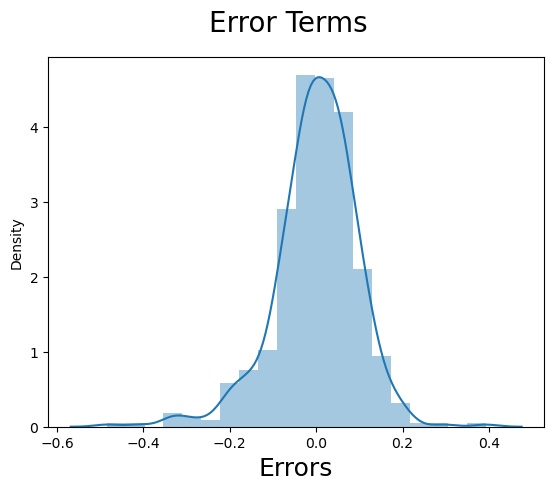

In [92]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

* From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## The Relationship between X & Y

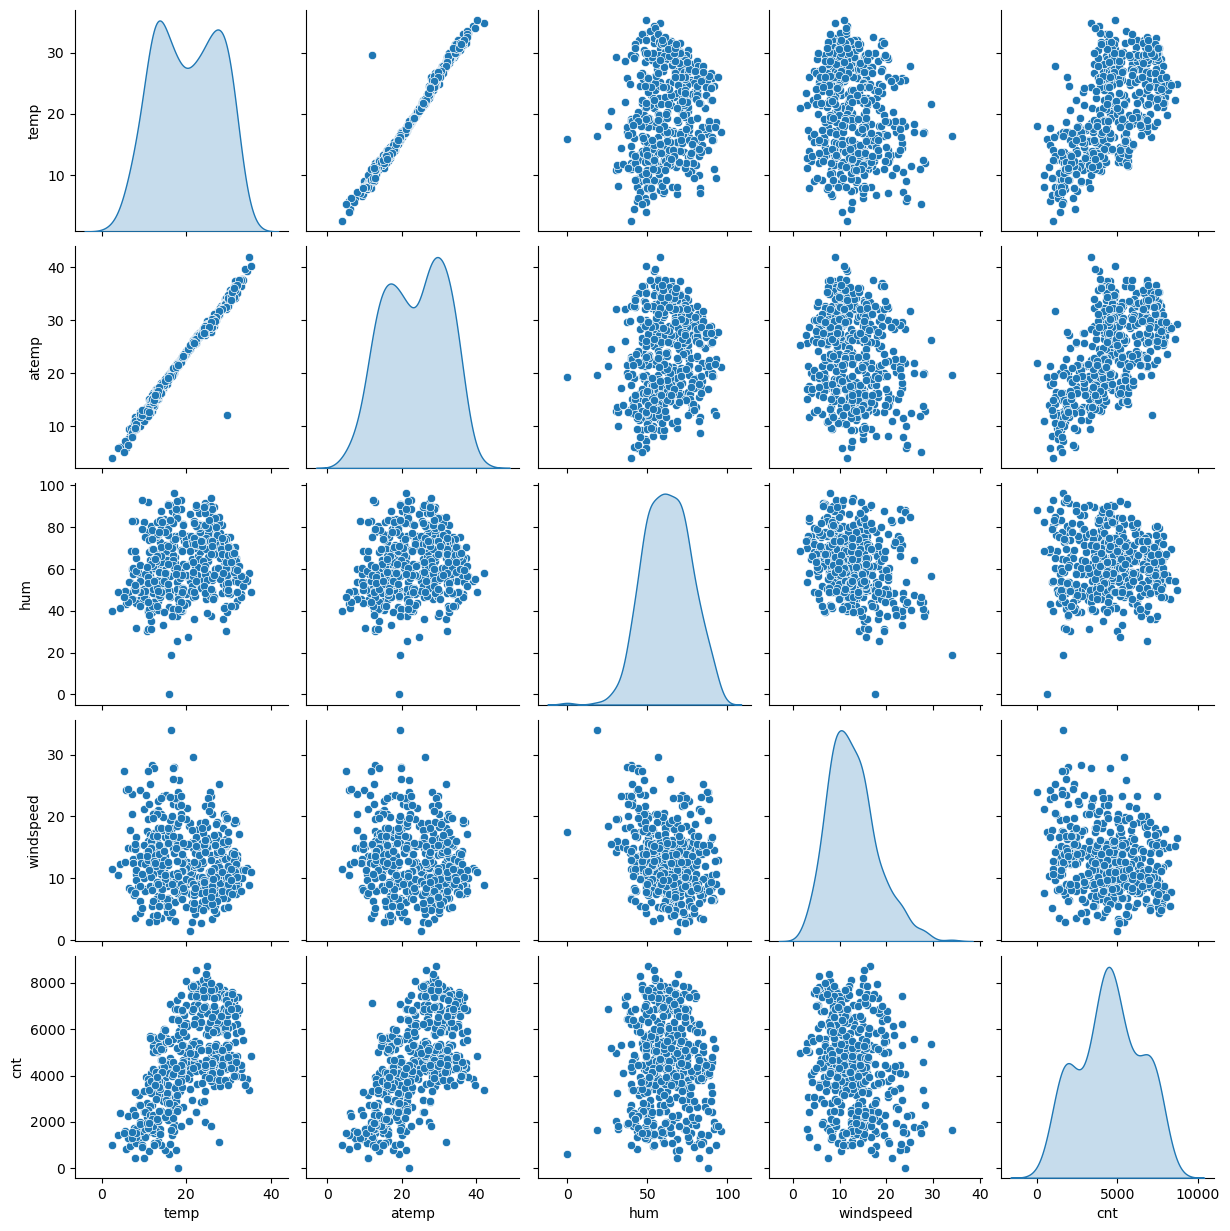

In [93]:
bike=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

* Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

### There is No Multicollinearity between the predictor variables

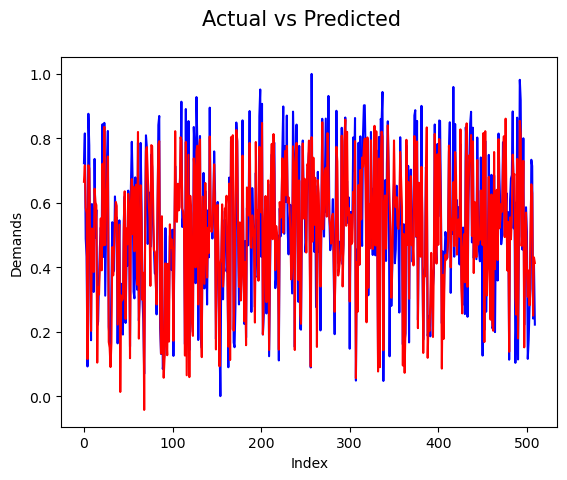

In [94]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# <span style = 'color : Red' > MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

<span style='background: lightGreen '> Applying the scaling on the test sets  </span>  <br> 

In [95]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [96]:
bike_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           0  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           0  0.951196  0.933712  0.596104   0.212829   
504   1        0           0  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  season_Spring  season_Summer  season_Winter  mnth_aug  \
22   0.110907              1              0              0         0   
468  0.855729              0              1              0         0   
553  0.534975              0              0              0         0   
504  0.817648              0              1              0         0   
353  0.428900              0              0              1         0   

     mnth_dec  mnth_feb  mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
22          0         0         1         0         0         0         0   
468         0         0         0         0         0         0         0   
553         0         0         0         1         0         0         0   
504         0         0         0         0         0         0         1   
353         1         0         0         0         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
22          0         0          0            0            0            1   
468         0         0          0            0            1            0   
553         0         0          0            0            0            1   
504         0         0          0            0            0            1   
353         0         0          0            0            0            0   

     weekday_thu  weekday_tue  weekday_wed  weathersit_Clear  \
22             0            0            0                 1   
468            0            0            0                 1   
553            0            0            0                 1   
504            0            0            0                 1   
353            0            1            0                 0   

     weathersit_Light_Snow_Rain  weathersit_Mist_Cloudy  
22                            0                       0  
468                           0                       0  
553                           0                       0  
504                           0                       0  
353                           0                       1

In [97]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932    0.551225    0.527528    0.662567   
std      0.501098    0.198967    0.465607    0.229463    0.215434    0.143562   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.356479    0.348019    0.553031   
50%      0.000000    0.000000    1.000000    0.557653    0.549198    0.662338   
75%      1.000000    0.000000    1.000000    0.751309    0.709163    0.762338   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt  season_Spring  season_Summer  season_Winter  \
count  219.000000  219.000000     219.000000     219.000000     219.000000   
mean     0.346706    0.518889       0.237443       0.264840       0.251142   
std      0.159553    0.219953       0.426491       0.442259       0.434663   
min      0.073090    0.055683       0.000000       0.000000       0.000000   
25%      0.232689    0.364703       0.000000       0.000000       0.000000   
50%      0.328208    0.525771       0.000000       0.000000       0.000000   
75%      0.435708    0.676887       0.000000       1.000000       0.500000   
max      0.824380    0.963300       1.000000       1.000000       1.000000   

         mnth_aug    mnth_dec    mnth_feb    mnth_jan    mnth_jul    mnth_jun  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.054795    0.105023    0.059361    0.086758    0.100457    0.105023   
std      0.228100    0.307285    0.236840    0.282125    0.301297    0.307285   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_mar    mnth_may    mnth_nov    mnth_oct   mnth_sept  \
count  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.100457    0.068493    0.073059    0.086758    0.082192   
std      0.301297    0.253169    0.260830    0.282125    0.275286   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   219.000000   219.000000   219.000000   219.000000   219.000000   
mean      0.155251     0.127854     0.146119     0.173516     0.146119   
std       0.362974     0.334692     0.354034     0.379560     0.354034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_Clear  weathersit_Light_Snow_Rain  \
count   219.000000        219.000000                  219.000000   
mean      0.118721          0.639269                    0.036530   
std       0.324202          0.481313                    0.188034   
min       0.000000          0.000000                    0.000000   
25%       0.000000          0.000000                    0.000000   
50%       0.000000          1.000000                    0.000000   
75%       0.000000          1.000000                    0.000000   
max       1.000000 

<span style='background: lightGreen '>  Dividing into X_test and y_test </span>  <br>

In [98]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_Spring               219 non-null    int32  
 8   season_Summer               219 non-null    int32  
 9   season_Winter               219 non-null    int32  
 10  mnth_aug                    219 non-null    int32  
 11  mnth_dec                    219 non-null    int32  
 12  mnth_feb                    219 non-null    int32  
 13  mnth_jan                    219 non-nul

In [99]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_Spring               219 non-null    int32  
 4   season_Winter               219 non-null    int32  
 5   mnth_dec                    219 non-null    int32  
 6   mnth_jan                    219 non-null    int32  
 7   mnth_nov                    219 non-null    int32  
 8   mnth_sept                   219 non-null    int32  
 9   weathersit_Clear            219 non-null    int32  
 10  weathersit_Light_Snow_Rain  219 non-null    int32  
 11  weathersit_Mist_Cloudy      219 non-null    int32  
dtypes: float64(2), int32(9), int64(1)
memory usage: 14.5 KB


In [100]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

# <span style = 'color : Red' > MODEL EVALUATION

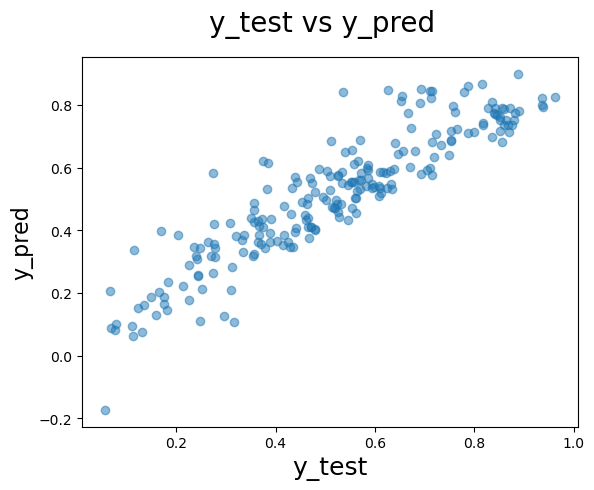

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [102]:
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.8245170640847853

## Adjusted R^2 Value for TEST

In [103]:
# We already have the value of R^2 (calculated in above step)

r2=0.8245170640847853

In [104]:
# Get the shape of X_test
X_test.shape

(219, 11)

In [105]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8151918839153778

# <span style = 'color : Red' > Final Result Comparison

* Train R^2 :0.815
* Train Adjusted R^2 :0.815
* Test R^2 :0.824
* Test Adjusted R^2 :0.815
* This seems to be a good model that can 'Generalize' the dataset well.

#<span style = 'color : Green' > Conclusion
Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season (Spring, Winter)
- months(January, July, September, November, December)
- Year
- weathersit( Light Snow Rain, Mist + Cloud, Clear)

So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking